In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import re
import string
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
bot = pd.read_csv("Sheet_1.csv",usecols=['response_id','class','response_text'],encoding='latin-1')
resume = pd.read_csv("Sheet_2.csv",encoding='latin-1')

In [4]:
bot.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [5]:
resume.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


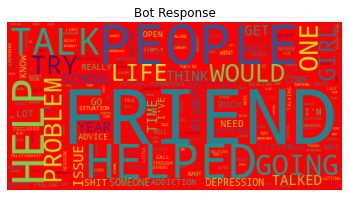

In [6]:
def cloud(text):
    wordcloud = WordCloud(background_color="red",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Bot Response")
cloud(bot['response_text'])

In [12]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #nltk kütüphanesinde hazır bir sentiment Intensity Analizi var
import nltk
import re
from textblob import TextBlob # metnin olumlu-olumsuz durumuna göre size 0-1 aralığında bir değer dönmektedir. TextBlob ile amacımız yazının olumlu mu olumsuz mu içerik içerdiğini anlamaktır.
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...


True

In [14]:
bot['label'] = Encode.fit_transform(bot['class'])

In [15]:
x = bot.response_text
y = bot.label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.75

In [16]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.7

In [17]:
x_test_dtm

<20x541 sparse matrix of type '<class 'numpy.int64'>'
	with 320 stored elements in Compressed Sparse Row format>

In [18]:
text = bot["response_text"]


Tf_idf = CountVectorizer(max_features=256).fit_transform(text.values)

In [19]:
tsne = TSNE(
    n_components=2,
    init='random', # pca
    random_state=34,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119037
[t-SNE] Computed conditional probabilities in 0.027s
[t-SNE] Iteration 50: error = 69.8175964, gradient norm = 0.4227443 (50 iterations in 0.126s)
[t-SNE] Iteration 100: error = 71.7578430, gradient norm = 0.3959224 (50 iterations in 0.053s)
[t-SNE] Iteration 150: error = 62.0871391, gradient norm = 0.5850121 (50 iterations in 0.050s)
[t-SNE] Iteration 200: error = 76.4642487, gradient norm = 0.3401099 (50 iterations in 0.048s)
[t-SNE] Iteration 250: error = 74.2192688, gradient norm = 0.3796955 (50 iterations in 0.052s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.219269
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234

In [20]:
bot.replace(('flagged','not_flagged'),(1,0),inplace=True)
bot.head()

,response_id,class,response_text,label
0,response_1,0,I try and avoid this sort of conflict,1
1,response_2,1,Had a friend open up to me about his mental ad...,0
2,response_3,1,I saved a girl from suicide once. She was goin...,0
3,response_4,0,i cant think of one really...i think i may hav...,1
4,response_5,0,Only really one friend who doesn't fit into th...,1


In [21]:
sentences=bot['label'].tolist()
labels=bot['class'].tolist()

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [23]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [24]:
vocab_size = 300
embedding_dim = 16
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_sentences = [str (item) for item in training_sentences]
testing_sentences = [str (item) for item in testing_sentences]

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            4800      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 4,909
Trainable params: 4,909
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
2/2 [==============================] - 4s 1s/step - loss: 0.7005 - accuracy: 0.2604 - val_loss: 0.6971 - val_accuracy: 0.3125
Epoch 2/30
2/2 [==============================] - 0s 93ms/step - loss: 0.6968 - accuracy: 0.3125 - val_loss: 0.6953 - val_accuracy: 0.3125
Epoch 3/30
2/2 [==============================] - 0s 75ms/step - loss: 0.6950 - accuracy: 0.3125 - val_loss: 0.6940 - val_accuracy: 0.3125
Epoch 4/30
2/2 [==============================] - 0s 79ms/step - loss: 0.6937 - accuracy: 0.3333 - val_loss: 0.6929 - val_accuracy: 0.6875
Epoch 5/30
2/2 [==============================] - 0s 73ms/step - loss: 0.6926 - accuracy: 0.6562 - val_loss: 0.6918 - val_accuracy: 0.6875
Epoch 6/30
2/2 [==============================] - 0s 73ms/step - loss: 0.6916 - accuracy: 0.6771 - val_loss: 0.6912 - val_accuracy: 0.6875
Epoch 7/30
2/2 [==============================] - 0s 70ms/step - loss: 0.6917 - accuracy: 0.6250 - val_loss: 0.6909 - val_accuracy: 0.6875
Epoch 8/30
2/2 [=============